Évaluation des résultats de lemmatisation 
==================================

## Objectifs

1. Lecture des logs
2. Alignement avec types de modèles
3. Lectures des résultats

## Data acquisition

In [1]:
import glob
import copy
from pandas import DataFrame

# IMPORTANT: THIS IS HARD CODED, SUPPORT FOR ALL LEMMA FROM DEV SET

nb_words_dev_set = 40812


ModelScheme = {
    "config": "",
    "tar": "",
}
file = "./logs/single-tasks-lemma-try.log"

def parse_lines(lines, task_prefix="## ", is_file=True):
    models = []
    tasks = []
    config = None
    current_task = None
    template = {
        "scores": {},
        "eval-time": [],
        "optimizer": "adam"
    }
    current = copy.deepcopy(template)
    for line in lines:
        if is_file and line.startswith("config_path: "):
            current["config"] = line.strip()[len("config_path: "):]
        elif is_file and line.startswith("cemb_dim: "):
            current["cemb_dim"] = line.strip()[len("cemb_dim: "):]
        elif is_file and line.startswith("cell: "):
            current["cell"] = line.strip()[len("cell: "):]
        elif is_file and line.startswith("hidden_size: "):
            current["hidden_size"] = line.strip()[len("hidden_size: "):]
        elif is_file and line.startswith("optimizer: "):
            current["optimizer"] = line.strip()[len("optimizer: "):]
        elif is_file and "Bye" in line.strip():
            models.append(current)
            current = copy.deepcopy(template)
            current_task = None
        elif line.startswith(task_prefix):
            current_task = line.strip()[len(task_prefix):]
            tasks.append(current_task)
            current["scores"][current_task] = {}
            current["task"] = current_task
        elif current_task and line.startswith("|"):  # We already have a task recorded
            cat, acc, pre, rec, sup = [x.strip() for x in line.strip().split("|") if x]
            if sup == "support" or "---" in sup:
                continue
            current["scores"][current_task][cat] = (float(acc)*100, float(pre)*100, float(rec)*100, int(sup))
        elif is_file and ".tar" in line:
            current["file"] = line.strip()[len("Saved best model to: ["):-1]
        #elif is_file and "Finished training in " in line:
        #    current["training-time"] = float(line.strip()[len("2020-04-23 23:13:33,251 : Finished training in ["):-1])
        #elif is_file and "Starting epoch" in line:
        #    current["nb-epochs"] = int(line.strip()[len("2020-04-23 20:23:00,051 : Starting epoch ["):-1])
        #elif is_file and "Evaluation time: " in line:
        #    current["eval-time"].append(
        #        float(line.strip()[len("2020-04-24 04:04:56,425 : Evaluation time: "):-len(" sec")])
        #    )
    if not is_file:
        current["file"] = f"default-{len(models)}"
        models.append(current)
    models = {
        model.get("file", "default"): model for model in models
    }
    tasks = {
        task: [model for model in models.values() if model["task"] == task]
        for task in tasks
    }
    return models, tasks

with open(file) as f:
    _, tasks = parse_lines(f)


## Reference score

In [2]:
REF = """
## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.972    | 0.82      | 0.8138 | 169819  |
| known-tokens     | 0.9768   | 0.8901    | 0.8878 | 161865  |
| unknown-tokens   | 0.8736   | 0.7299    | 0.7254 | 7954    |
| ambiguous-tokens | 0.9264   | 0.6885    | 0.6953 | 42700   |
| unknown-targets  | 0.6304   | 0.464     | 0.4619 | 1104    |


## pos

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9611   | 0.938     | 0.9271 | 169819  |
| known-tokens     | 0.9641   | 0.9462    | 0.9312 | 161865  |
| unknown-tokens   | 0.9017   | 0.6995    | 0.6657 | 7954    |
| ambiguous-tokens | 0.9031   | 0.8792    | 0.8432 | 52025   |


## Gend

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9631   | 0.9107    | 0.9138 | 169819  |
| known-tokens     | 0.9656   | 0.9145    | 0.9192 | 161865  |
| unknown-tokens   | 0.9125   | 0.8507    | 0.8357 | 7954    |
| ambiguous-tokens | 0.8796   | 0.8799    | 0.8891 | 40191   |


## Numb

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9718   | 0.9702    | 0.9698 | 169819  |
| known-tokens     | 0.9734   | 0.9717    | 0.9712 | 161865  |
| unknown-tokens   | 0.9395   | 0.9094    | 0.9196 | 7954    |
| ambiguous-tokens | 0.9086   | 0.9051    | 0.9019 | 39600   |


## Case

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9219   | 0.8863    | 0.8198 | 169819  |
| known-tokens     | 0.9243   | 0.8919    | 0.8262 | 161865  |
| unknown-tokens   | 0.8726   | 0.6355    | 0.6256 | 7954    |
| ambiguous-tokens | 0.8318   | 0.8454    | 0.7857 | 64272   |


## Deg

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9799   | 0.968     | 0.9703 | 169819  |
| known-tokens     | 0.9822   | 0.9702    | 0.9751 | 161865  |
| unknown-tokens   | 0.933    | 0.9246    | 0.8993 | 7954    |
| ambiguous-tokens | 0.9197   | 0.9188    | 0.9332 | 29785   |


## Mood_Tense_Voice

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9822   | 0.7717    | 0.6944 | 169819  |
| known-tokens     | 0.9857   | 0.7829    | 0.711  | 161865  |
| unknown-tokens   | 0.911    | 0.6222    | 0.5942 | 7954    |
| ambiguous-tokens | 0.9222   | 0.6828    | 0.6701 | 17876   |


## Person

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9971   | 0.9879    | 0.9768 | 169819  |
| known-tokens     | 0.9979   | 0.9893    | 0.9822 | 161865  |
| unknown-tokens   | 0.9821   | 0.976     | 0.9461 | 7954    |
| ambiguous-tokens | 0.9788   | 0.9416    | 0.9223 | 10188   |


## Dis

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9716   | 0.8677    | 0.8749 | 169819  |
| known-tokens     | 0.973    | 0.8691    | 0.8783 | 161865  |
| unknown-tokens   | 0.9439   | 0.6508    | 0.5098 | 7954    |
| ambiguous-tokens | 0.9126   | 0.8507    | 0.8618 | 43148   |

""".split("\n")

ref, ref_tasks = parse_lines(REF, "## ", is_file=False)

## Tabulate data

In [3]:
column = [
    "file", "task", "config",
    "optimizer", "cell", "hidden", "cemb",
    "score",
    *[
        f"{'-'.join([x[:3] for x in cat.split('-')])}-{score[:3]}"
        for cat in tasks["lemma"][0]["scores"]["lemma"]
        for score in ("acc", "prec", "rec")
    ],
    *[
        f"rank-{'-'.join([x[:3] for x in cat.split('-')])}-{score[:3]}"
        for cat in tasks["lemma"][0]["scores"]["lemma"]
        for score in ("acc", "prec", "rec")
    ]
]


table = []
for task, files in tasks.items():
    for model in files:
        table.append([
            model["file"],
            task,
            f'{model["optimizer"]}-{model["cell"]}-H{model["hidden_size"]}-C{model["cemb_dim"]}',
            model["optimizer"],
            model["cell"],
            model["hidden_size"],
            model["cemb_dim"],
            .0, # Future Ranking Score
            # Scores
            *[
                score
                for cat in tasks["lemma"][0]["scores"]["lemma"]
                for score in model["scores"][task].get(cat, [.0, .0, .0])[:3]
            ],
            *[
                .0
                for cat in tasks["lemma"][0]["scores"]["lemma"]
                for score in model["scores"][task].get(cat, [.0, .0, .0])[:3]
            ]
        ])
    
table = sorted(table, key=lambda x: f"{x[1]}.{x[8]*100:.2f}")  # 2 is acc, 3 amb, 5 tokens
table = [column] + table

In [4]:
import tabulate
from IPython.display import HTML, display


In [5]:
with open("3 - Optimisation des Modeles - Entrainement comme tache unique - Models - Full.csv", "w") as f:
    import csv
    writer = csv.writer(f)
    writer.writerows(table)

# Attempt at ranking

In [6]:
ranks = DataFrame(
    [x[1:] for x in table[1:]],
    columns=column[1:],
    index=[x[0] for x in table[1:]]
)
needs_ranking = column[8:column.index('rank-all-acc')]
    
for task in tasks:
    ranking_subset = needs_ranking if task == "lemma" else needs_ranking[:-3]
    for col in ranking_subset:
        #ranks[f"rank-{col}"] = ranks[col].rank(ascending=False)
        ranks[f"rank-{col}"] += ranks.where(ranks['task'].eq(task))[col].rank(ascending=False).fillna(0)

    #ranks["score"] = sum(
    #    ranks.where(ranks['task'].eq(task))[[f"rank-{col}" for col in needs_ranking]].fillna(0)
    #) / len(ranking_subset)

ranks["score"] += (sum([ranks[f"rank-{col}"].where(ranks['task'].eq("lemma")) for col in needs_ranking]) / (len(needs_ranking))).fillna(0)
ranks["score"] += (sum([ranks[f"rank-{col}"].where(ranks['task'].ne("lemma")) for col in needs_ranking]) / (len(needs_ranking)-3)).fillna(0)

ranks.to_csv("3 - Optimisation des Modeles - Entrainement comme tache unique - Models - Experiment Ranger Adams Hidden - Ranks.csv")

In [7]:
display(HTML(ranks.sort_values(["task", "score"]).to_html()))

,task,config,optimizer,cell,hidden,cemb,score,all-acc,all-pre,all-rec,kno-tok-acc,kno-tok-pre,kno-tok-rec,unk-tok-acc,unk-tok-pre,unk-tok-rec,amb-tok-acc,amb-tok-pre,amb-tok-rec,unk-tar-acc,unk-tar-pre,unk-tar-rec,rank-all-acc,rank-all-pre,rank-all-rec,rank-kno-tok-acc,rank-kno-tok-pre,rank-kno-tok-rec,rank-unk-tok-acc,rank-unk-tok-pre,rank-unk-tok-rec,rank-amb-tok-acc,rank-amb-tok-pre,rank-amb-tok-rec,rank-unk-tar-acc,rank-unk-tar-pre,rank-unk-tar-rec
./models/latin-upvc-single-lemma-complexe5-lemma-2021_03_01-00_30_57.tar,lemma,Ranger-LSTM-H128-C300,Ranger,LSTM,128,300,7.700000,97.32,84.41,84.09,97.72,90.53,90.52,89.23,76.31,75.96,92.56,69.62,70.30,62.05,45.10,44.96,7.0,1.0,1.0,15.0,9.0,9.5,1.0,1.0,1.0,16.0,12.0,11.0,9.0,11.0,11.0
./models/latin-upvc-single-lemma-complexe5-lemma-2021_03_01-04_20_34.tar,lemma,Ranger-LSTM-H128-C300,Ranger,LSTM,128,300,8.466667,97.32,83.82,83.41,97.75,90.46,90.41,88.58,75.11,74.65,92.73,69.97,70.58,61.96,45.14,45.01,7.0,3.0,3.0,10.0,12.0,12.0,6.0,6.0,6.0,12.0,10.0,9.0,11.0,10.0,10.0
./models/latin-upvc-single-lemma-complexe6-lemma-2021_03_01-21_07_09.tar,lemma,Ranger-LSTM-H128-C250,Ranger,LSTM,128,250,10.366667,97.33,84.27,83.98,97.73,90.47,90.43,89.15,76.09,75.82,92.68,69.41,70.13,61.05,44.32,44.12,5.0,2.0,2.0,13.5,10.5,11.0,2.0,2.0,2.0,13.5,13.0,14.0,22.0,21.0,22.0
./models/latin-upvc-single-lemma-complexe6-lemma-2021_03_02-13_07_04.tar,lemma,Ranger-LSTM-H192-C300,Ranger,LSTM,192,300,12.166667,97.32,83.38,82.99,97.75,89.98,89.90,88.50,74.89,74.48,92.76,69.16,69.66,61.50,44.68,44.58,7.0,8.5,7.5,10.0,20.0,21.0,7.0,7.0,7.0,9.5,16.0,18.0,15.0,15.0,14.0
./models/latin-upvc-single-lemma-complexe7-lemma-2021_03_04-00_00_05.tar,lemma,Ranger-LSTM-H170-C300,Ranger,LSTM,170,300,12.866667,97.40,83.52,83.34,97.86,91.19,91.16,87.98,73.51,73.34,93.06,71.23,71.42,52.17,35.27,35.20,1.0,5.0,4.0,1.5,2.0,2.0,19.0,21.0,20.0,2.0,2.0,3.0,36.5,37.0,37.0
./models/latin-upvc-single-lemma-complexe6-lemma-2021_03_01-16_01_19.tar,lemma,Ranger-LSTM-H128-C250,Ranger,LSTM,128,250,13.000000,97.25,83.39,82.98,97.68,89.86,89.83,88.61,75.15,74.72,92.52,67.85,68.78,62.41,45.74,45.54,13.5,7.0,9.0,19.5,24.0,24.5,5.0,5.0,5.0,17.5,25.0,26.0,4.0,5.0,5.0
./models/latin-upvc-single-lemma-complexe6-lemma-2021_03_02-23_51_52.tar,lemma,Ranger-LSTM-H192-C300,Ranger,LSTM,192,300,13.000000,97.34,82.93,82.48,97.79,89.71,89.58,88.09,74.28,73.80,93.01,70.08,70.78,61.78,44.98,44.87,3.5,15.5,20.0,6.5,26.0,31.0,13.5,12.0,14.0,3.0,7.0,7.0,12.0,12.0,12.0
./models/latin-upvc-single-lemma-complexe4-lemma-2021_02_28-02_08_11.tar,lemma,Adam-LSTM-H128-C300,Adam,LSTM,128,300,13.333333,97.22,83.53,83.27,97.63,89.95,90.00,88.70,75.28,74.95,92.32,67.38,68.48,63.13,46.43,46.36,16.5,4.0,6.0,27.5,21.0,17.0,4.0,3.0,3.0,29.0,31.0,29.0,3.0,3.0,3.0
./models/latin-upvc-single-lemma-complexe6-lemma-2021_03_01-22_53_24.tar,lemma,Ranger-LSTM-H128-C250,Ranger,LSTM,128,250,16.166667,97.25,83.13,82.76,97.69,90.02,89.97,88.16,74.15,73.79,92.52,69.24,70.06,61.14,44.29,44.16,13.5,12.0,12.0,17.5,17.0,18.0,11.0,17.0,15.0,17.5,14.0,15.0,20.0,22.0,21.0
./models/latin-upvc-single-lemma-complexe5-lemma-2021_02_28-16_51_43.tar,lemma,Ranger-LSTM-H128-C300,Ranger,LSTM,128,300,16.666667,97.34,83.46,83.32,97.83,91.43,91.41,87.31,72.55,72.53,92.94,71.75,72.17,49.73,33.31,33.25,3.5,6.0,5.0,3.0,1.0,1.0,29.0,31.0,29.0,4.0,1.0,1.0,45.5,45.0,45.0


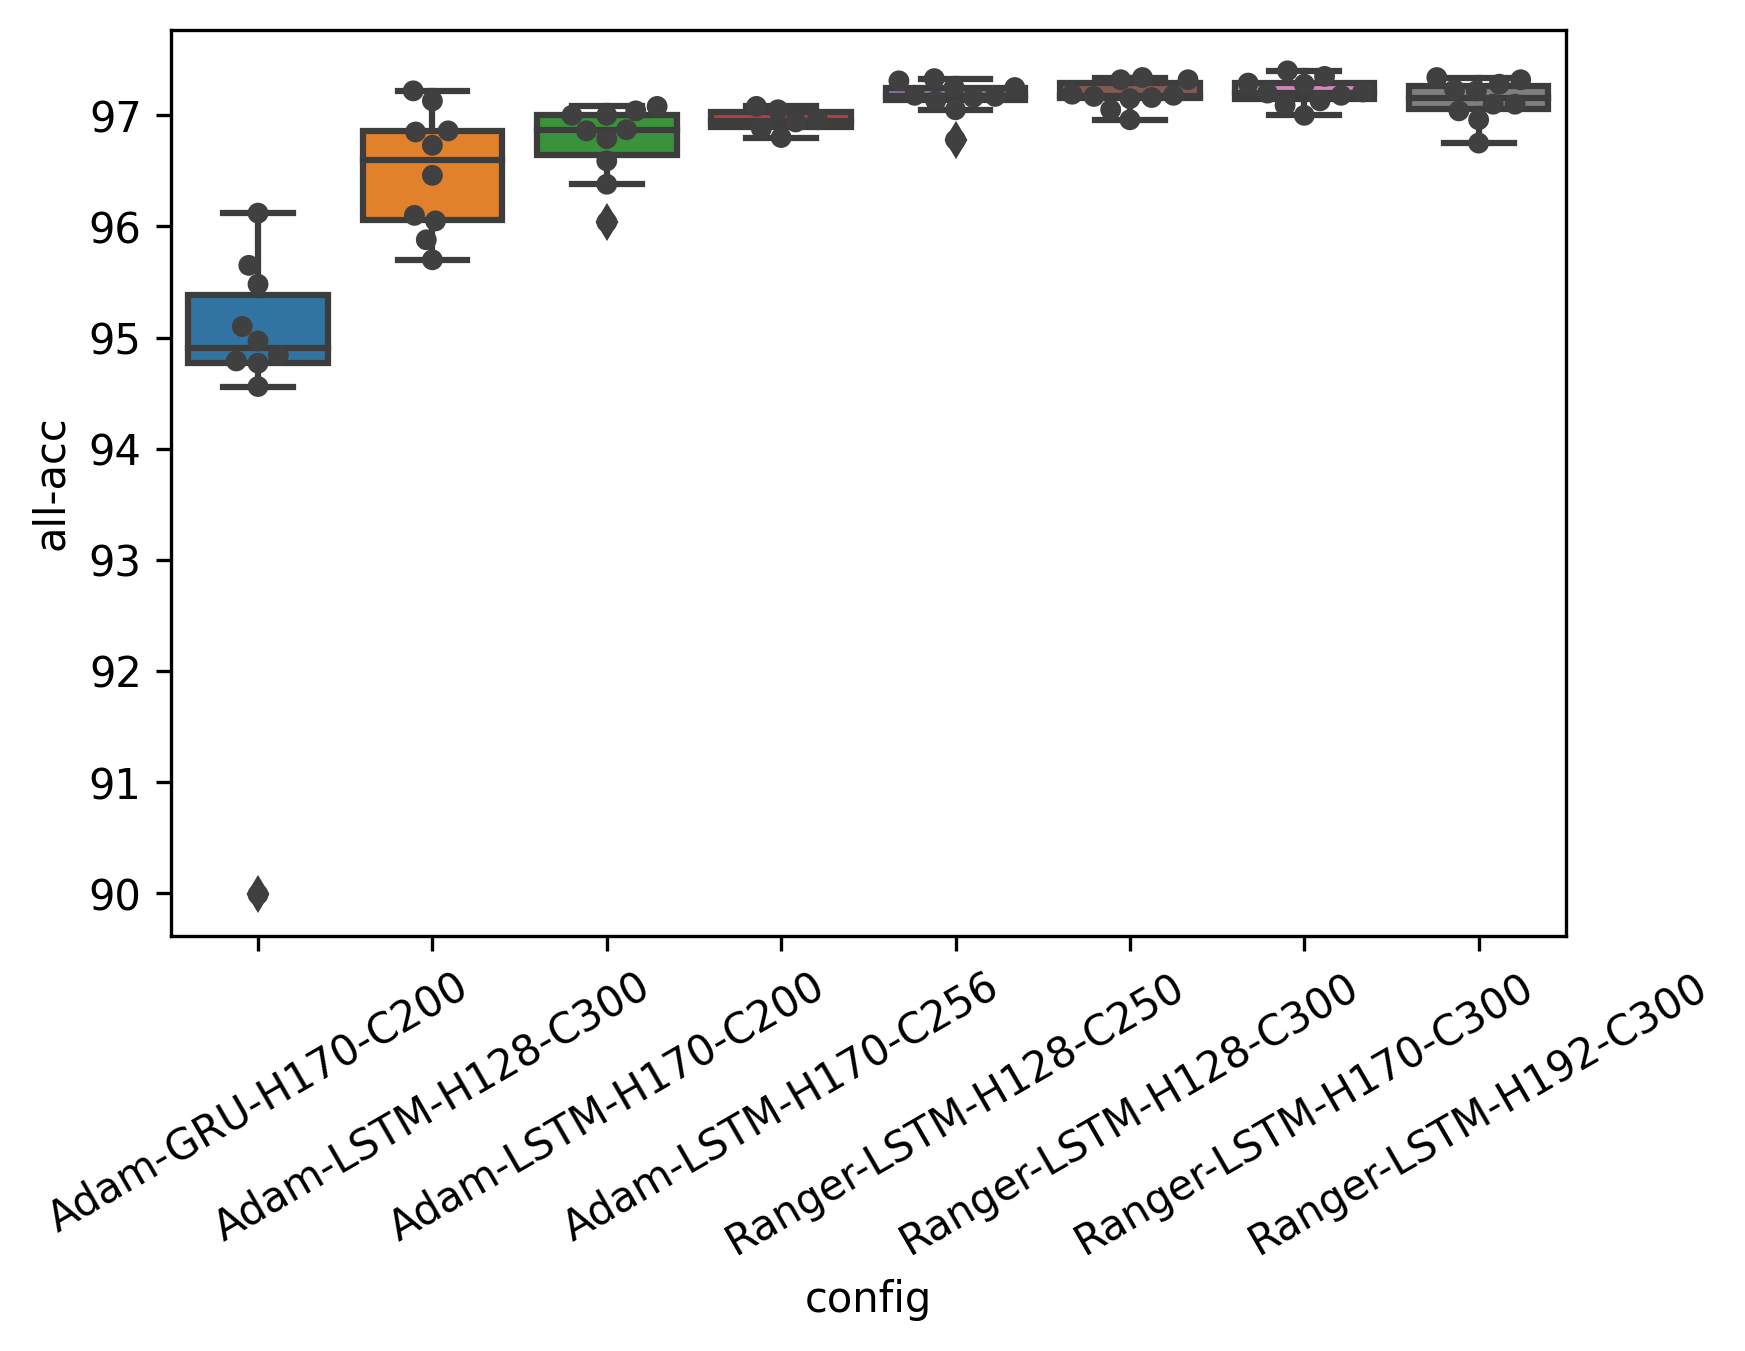

In [8]:
import seaborn as sns


ax = sns.boxplot(y="all-acc", x="config", data=ranks.sort_values("config"))
ax = sns.swarmplot(y="all-acc", x="config", data=ranks.sort_values("config"), color=".25")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.figure.set_dpi(300)

# Evaluating against current best-model

In [9]:
ref_score = {
    task: tuple([
            score
            for cat in model["scores"][task]
            for score in model["scores"][task][cat][:3]
        ]
    )
    for model in ref.values()
    for task in model["scores"]
}

In [10]:
for task in tasks:
    need_diff = column[8:column.index('rank-all-acc')]
    need_diff = need_diff if task == "lemma" else need_diff[:-3]
    
    cols = [
        f"{'-'.join([x[:3] for x in cat.split('-')])}-{score[:3]}"
        for cat in tasks[task][0]["scores"][task]
        for score in ("acc", "prec", "rec")
    ]
    for cat, r in zip(cols, ref_score[task]):
        if f"diff-{cat}" not in ranks.columns:
            ranks[f"diff-{cat}"] = 0
        ranks[f"diff-{cat}"] += (ranks[cat].where(ranks['task'].eq(task)) - r).fillna(0)

# Comparing best model of each configuration 

## With best score

In [11]:
beautiful = {
    "kno-tok": "Known tokens",
    "unk-tok": "Unknown tokens",
    "amb-tok": "Ambiguous tokens",
    "unk-tar": "Unknown target",
    "all": "All"
}
all_cols = [ranks.columns[1], *ranks.columns[6:22]] 
cols = [
    "" if "-" not in colname else beautiful["-".join(colname.split("-")[:-1])]
    for colname in all_cols
]
cols2 = [
    colname if "-" not in colname else colname.split("-")[-1]
    for colname in all_cols
]
new = ranks.sort_values('score', ascending=True)[all_cols].copy().drop_duplicates(['config'])
new.columns = [cols, cols2]

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s >= s.max()-0.1*s.std() # Pondérée comme suit: >= Au meilleur score moins 10% de STD Dev
    return ['background-color: darkgrey' if v else '' for v in is_max]

display(
    HTML(
        new.
            sort_values(("", "score")).
            style.
                set_precision(2).
                #format(lambda x: f"{x:.2f}" if isinstance(x, float) else x).
                apply(highlight_max, axis=0, subset=new.columns[2:]).
                hide_index().
                render(index=False)
    )
)
#display(HTML(new.sort_values(("", "score")).to_html(index=False)))

## With medians

In [12]:
beautiful = {
    "kno-tok": "Known tokens",
    "unk-tok": "Unknown tokens",
    "amb-tok": "Ambiguous tokens",
    "unk-tar": "Unknown target",
    "all": "All"
}
all_cols = [ranks.columns[1], *ranks.columns[6:22]] 
cols = [
    "" if "-" not in colname else beautiful["-".join(colname.split("-")[:-1])]
    for colname in all_cols
]
cols2 = [
    colname if "-" not in colname else colname.split("-")[-1]
    for colname in all_cols
]
new = ranks.sort_values('score', ascending=True)[all_cols].copy().groupby("config").median()
new.columns = [cols[1:], cols2[1:]]  # 0 removed because it becomes the index

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s >= s.max()-0.1*s.std() # Pondérée comme suit: >= Au meilleur score moins 10% de STD Dev
    return ['background-color: darkgrey' if v else '' for v in is_max]

display(
    HTML(
        new.
            sort_values(("", "score")).
            style.
                set_precision(2).
                apply(highlight_max, axis=0, subset=new.columns[1:]).
                render()
    )
)
#display(HTML(new.sort_values(("", "score")).to_html(index=False)))

# Evaluating (un)stability

<ipython-input-13-80c0b51b4737>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


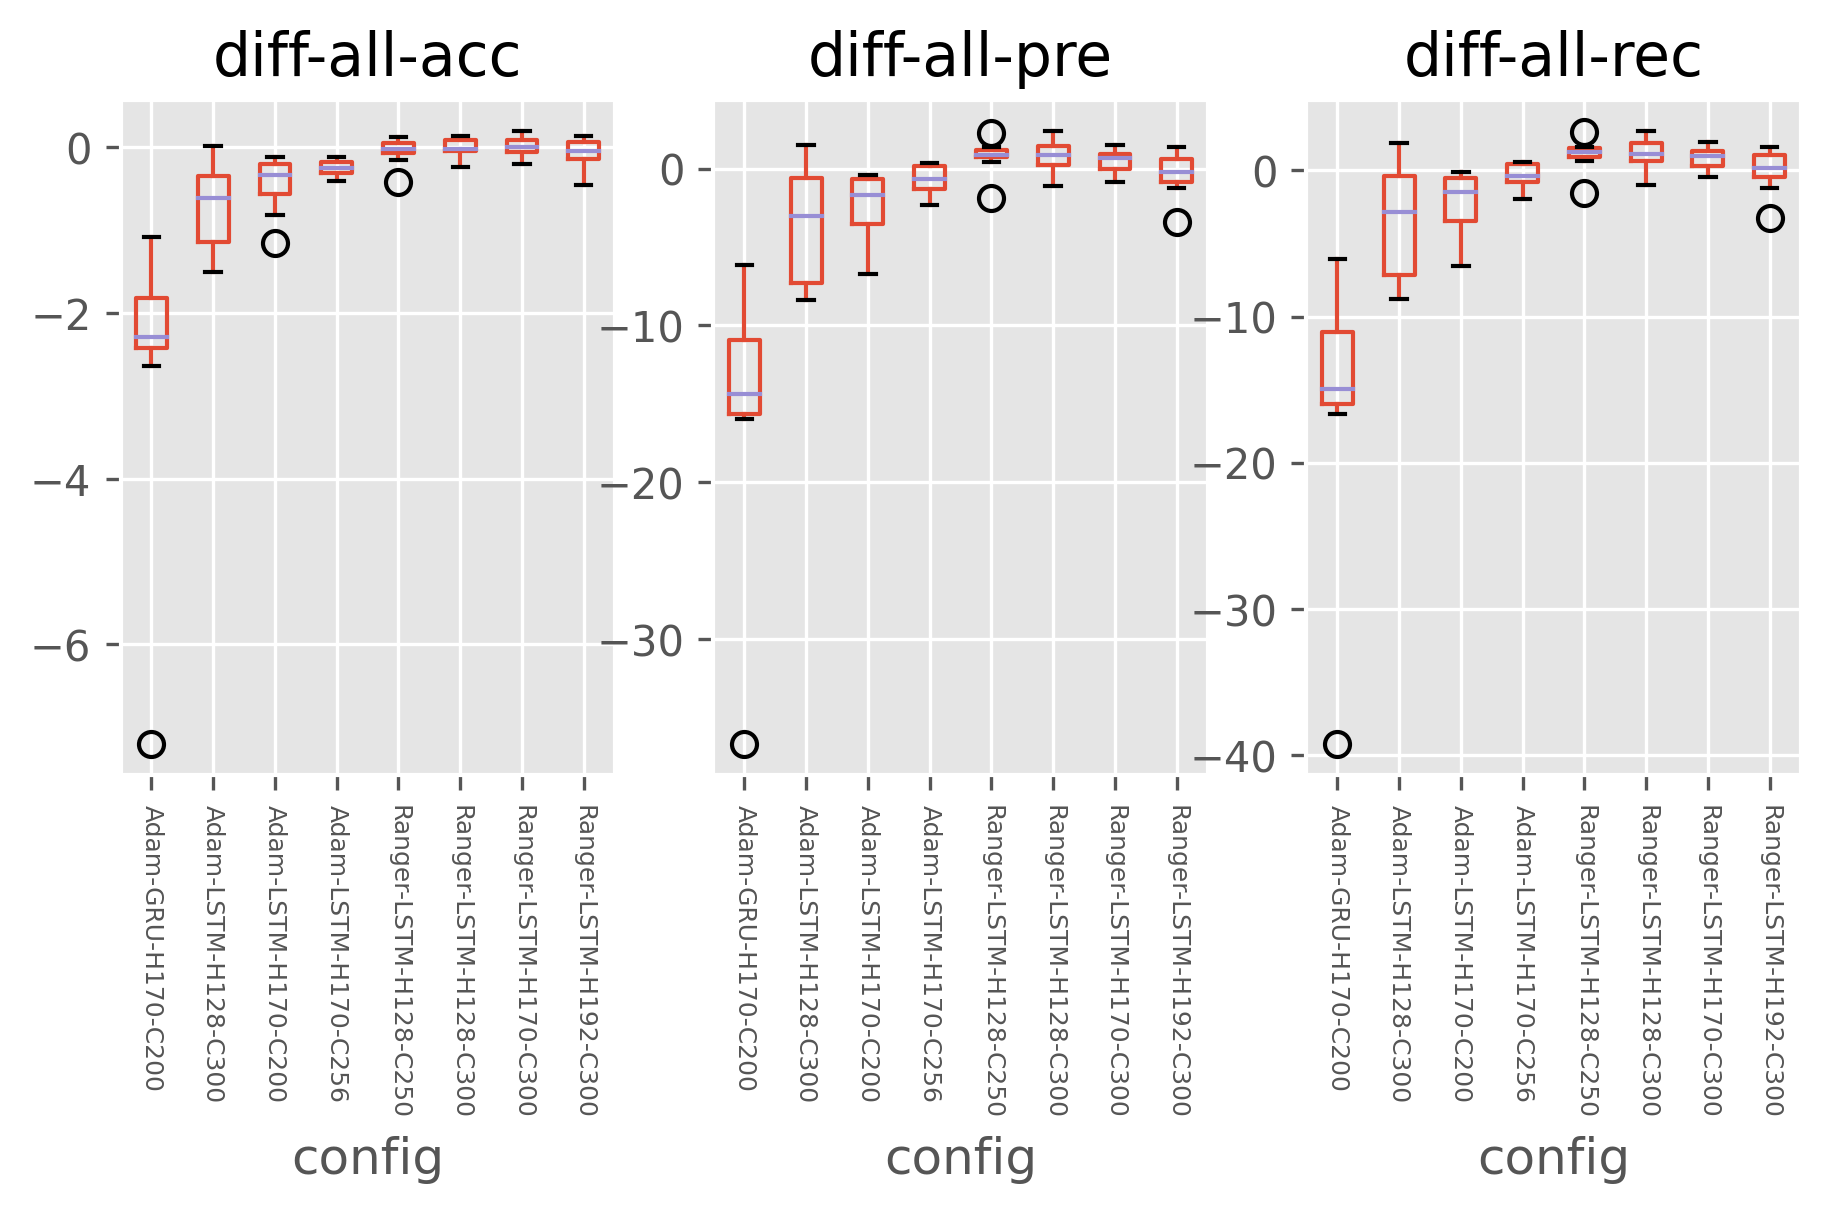

In [13]:
import matplotlib.pyplot as plt    

plt.style.use('ggplot')
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,3), dpi=300)#, sharey=True)
ranks.sort_values("config").boxplot(column="diff-all-acc", by="config", ax=ax1, vert=True, rot=-90)
ranks.sort_values("config").boxplot(column="diff-all-pre", by="config", ax=ax2, vert=True, rot=-90)
ranks.sort_values("config").boxplot(column="diff-all-rec", by="config", ax=ax3, vert=True, rot=-90)
fig.suptitle("")
fig.show()

## Checking Standard Deviation globally

<ipython-input-14-fcf996cfdede>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


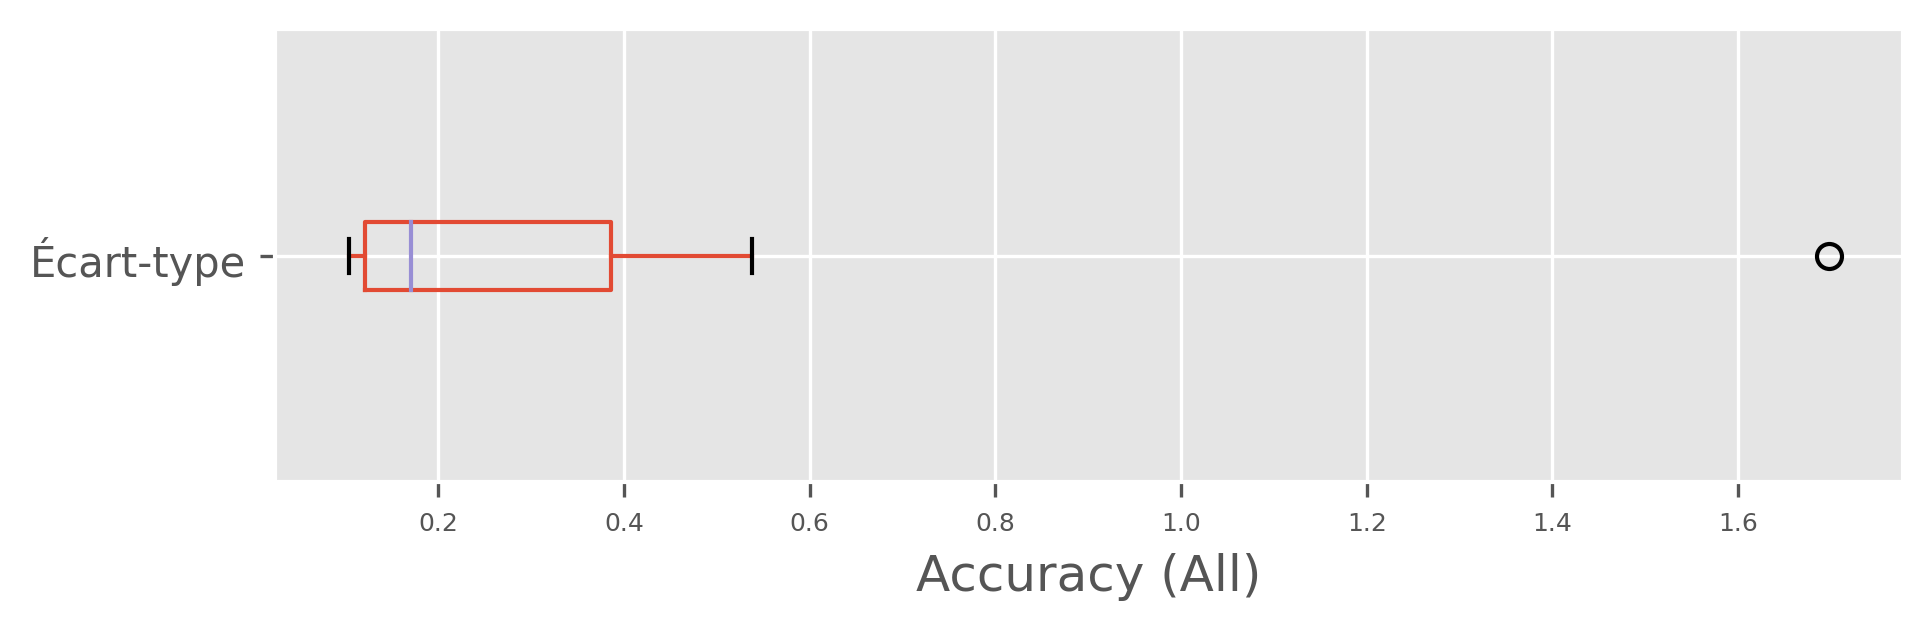

In [14]:
from pandas import Series

fig = plt.figure(figsize=(7,2), dpi=300)
ax = fig.gca()
serie = Series((ranks.groupby("config")["all-acc"].std()).tolist(), name="Écart-type")
ax = serie.plot.box(ax=ax, vert=False)#*100
ax.set_xlabel("Accuracy (All)")
fig.show()

## Looking at standard dev locally

In [15]:
beautiful = {
    "kno-tok": "Known tokens",
    "unk-tok": "Unknown tokens",
    "amb-tok": "Ambiguous tokens",
    "unk-tar": "Unknown target",
    "all": "All"
}
all_cols = [ranks.columns[1], *ranks.columns[7:22]] 
cols = [
    "" if "-" not in colname else beautiful["-".join(colname.split("-")[:-1])]
    for colname in all_cols
]
cols2 = [
    colname if "-" not in colname else colname.split("-")[-1]
    for colname in all_cols
]
new = ranks[all_cols].copy().groupby("config").std()
new.columns = [cols[1:], cols2[1:]]

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s <= s.min()*1.1
    return ['background-color: darkgrey' if v else '' for v in is_max]

display(
    HTML(
        new.
            sort_values(("All", "acc")).
            style.
                set_precision(2).
                #format(lambda x: f"{x:.2f}" if isinstance(x, float) else x).
                apply(highlight_max, axis=0).
                render(index=True)
    )
)

# Keeping the best model only

In [16]:
best = {
}

end_index = column.index('rank-all-acc')
elements = [
    ["file", "task"] + column[8:end_index]
]

for task in tasks:
    best_score = ranks.loc[ranks.task==task, "score"].min()
    print(best_score)
    
    best[task] = ranks.loc[ranks.task==task][ranks["score"]==best_score].index.tolist()[0]
    print(best[task])
    elements.append([
        best[task],
        task,
        *ranks[ranks.index==best[task]][(f"diff-{col}" for col in column[8:end_index])].values.tolist()[0]
    ])

7.7
./models/latin-upvc-single-lemma-complexe5-lemma-2021_03_01-00_30_57.tar


In [17]:
# Create a table like representation
import tabulate
from IPython.display import HTML, display

display(HTML(tabulate.tabulate(elements, floatfmt="0.2f", tablefmt='html')))

for task_row in elements[1:]:
    print(f"mv {task_row[0]} bests/{task_row[1]}.tar")

file,task,all-acc,all-pre,all-rec,kno-tok-acc,kno-tok-pre,kno-tok-rec,unk-tok-acc,unk-tok-pre,unk-tok-rec,amb-tok-acc,amb-tok-pre,amb-tok-rec,unk-tar-acc,unk-tar-pre,unk-tar-rec
./models/latin-upvc-single-lemma-complexe5-lemma-2021_03_01-00_30_57.tar,lemma,0.11999999999999034,2.4099999999999966,2.710000000000008,0.03999999999999204,1.519999999999996,1.7399999999999949,1.8700000000000045,3.3200000000000074,3.4200000000000017,-0.0799999999999983,0.7700000000000102,0.769999999999996,-0.9899999999999949,-1.3000000000000043,-1.2299999999999969


mv ./models/latin-upvc-single-lemma-complexe5-lemma-2021_03_01-00_30_57.tar bests/lemma.tar


## Printing score

In [18]:
reformated = [[row[1], *row[2:5], row[5], row[8], row[11], row[14]] for row in elements]
display(HTML(tabulate.tabulate(
    reformated[1:], headers=reformated[0], tablefmt='html')))
print("-------------------------------------------------------")
print("-------------------------------------------------------")

reformated = [[row[1], *row[2:18]] for row in elements]
beautiful = {
    "kno-tok": "Known tokens",
    "unk-tok": "Unknown tokens",
    "amb-tok": "Ambiguous tokens",
    "unk-tar": "Unknown target",
    "all": "All"
}
cols = [
    "" if "-" not in colname else beautiful["-".join(colname.split("-")[:-1])]
    for colname in reformated[0]
]
cols2 = [
    colname if "-" not in colname else colname.split("-")[-1]
    for colname in reformated[0]
]
new = ranks.filter(items=list(best.values()), axis=0)[reformated[0]].copy()
new.columns = [cols, cols2]
display(HTML(new.sort_values(("", "task")).to_html(index=False)))

task,all-acc,all-pre,all-rec,kno-tok-acc,unk-tok-acc,amb-tok-acc,unk-tar-acc
lemma,0.12,2.41,2.71,0.04,1.87,-0.08,-0.99


-------------------------------------------------------
-------------------------------------------------------
